# Importing Modules

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


# Input directories

In [2]:
input_dir='D:/paddy_leaf/Rice Leaf Disease Images2'
train_data = 'D:/paddy_leaf/Rice Leaf Disease Images2/train'
test_data = 'D:/paddy_leaf/Rice Leaf Disease Images2/test'
categories = ['Bacterialblight','Blast','Brownspot','Healthy','Leaf smut','Tungro']

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
pred_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
IMG_SIZE      = 128
data_list     = os.listdir(train_data)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 32 
EPOCHS        = 20
CATEGORIES    = ['Bacterialblight','Blast','Brownspot','Healthy','Leaf smut','Tungro']

num_classes = 6

In [5]:
train_set = train_datagen.flow_from_directory(train_data,
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        shuffle=True,
        seed=None,
        class_mode="categorical")


Found 6038 images belonging to 6 classes.


In [6]:
test_set = test_datagen.flow_from_directory(test_data,
        target_size=(IMG_SIZE, IMG_SIZE),
        color_mode='rgb',
        batch_size=BATCH_SIZE,
        shuffle=True,
        seed=None,
        class_mode="categorical")

Found 1128 images belonging to 6 classes.


In [7]:
print(os.listdir(train_data))
print(os.listdir(test_data))

['Bacterialblight', 'Blast', 'Brownspot', 'Healthy', 'Leaf smut', 'Tungro']
['Bacterialblight', 'Blast', 'Brownspot', 'Healthy', 'Leaf smut', 'Tungro']


# Image visualization

(-0.5, 303.5, 227.5, -0.5)

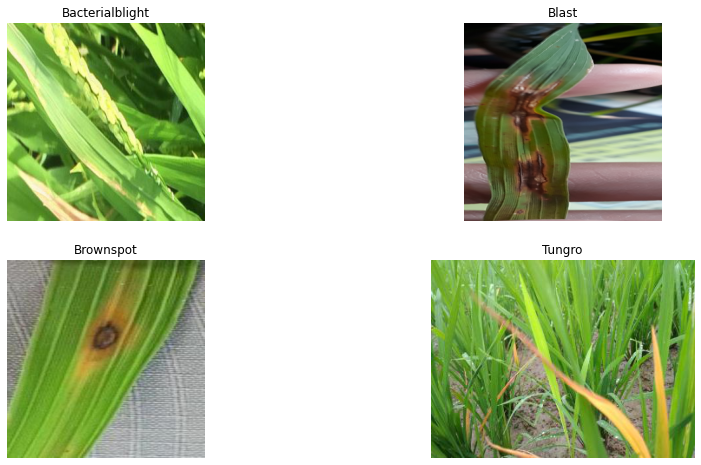

In [8]:
def plot_images(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img.astype('float32')/255.0
    plt.imshow(img)
    return
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title('Bacterialblight')
plot_images(train_data+'/Bacterialblight/BACTERAILBLIGHT3_020.jpg')
plt.axis('off')
plt.subplot(222)
plt.title('Blast')
plot_images(train_data+'/Blast/BLAST1_022.jpg')
plt.axis('off')
plt.subplot(223)
plt.title('Brownspot')
plot_images(train_data+'/Brownspot/brownspot_orig_033.jpg')
plt.axis('off')
plt.subplot(224)
plt.title('Healthy')
plot_images(train_data+'/Healthy/IMG_20190419_124654.jpg')
plt.axis('off')
plt.title('Leaf smut')
plot_images(train_data+'/Leaf smut/DSC_0513.jpg')
plt.axis('off')
plt.title('Tungro')
plot_images(train_data+'/Tungro/TUNGRO1_031.jpg')
plt.axis('off')


# Total images

In [9]:
print('train data:')
total_train_samples = 0
for folder in os.listdir(train_data):
    num_cells = len(os.listdir(os.path.join(train_data, folder)))
    total_train_samples += num_cells
    print('folder: {:15s}  num samples: {:d}'.format(folder, num_cells))
print('Total training images: {:d}\n'.format(total_train_samples))

train data:
folder: Bacterialblight  num samples: 1339
folder: Blast            num samples: 1222
folder: Brownspot        num samples: 1346
folder: Healthy          num samples: 995
folder: Leaf smut        num samples: 28
folder: Tungro           num samples: 1108
Total training images: 6038



In [10]:
print('test data:')
total_test_samples = 0
for folder in os.listdir(test_data):
    num_cells = len(os.listdir(os.path.join(test_data, folder)))
    total_test_samples += num_cells
    print('folder: {:15s}  num samples: {:d}'.format(folder, num_cells))
print('Total test images: {:d}\n'.format(total_test_samples))

test data:
folder: Bacterialblight  num samples: 245
folder: Blast            num samples: 218
folder: Brownspot        num samples: 254
folder: Healthy          num samples: 196
folder: Leaf smut        num samples: 15
folder: Tungro           num samples: 200
Total test images: 1128



# CNN layers

In [11]:
def get_model():
    
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6,activation = 'softmax')

],    name = 'Conv2D_Model')

    model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

    return model

# Model summary

In [12]:
model = get_model()
print(model.summary())

Model: "Conv2D_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)            

In [13]:
def get_data(folder):
    X = []
    y = []

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            for image_filename in os.listdir(folder + wbc_type):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(wbc_type)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

# Image encoding

In [ ]:
X_train, y_train = get_data(input_dir+'/TRAIN/')
X_test, y_test = get_data(input_dir + '/TEST/')

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)

y_train = np_utils.to_categorical(encoded_y_train)
y_test = np_utils.to_categorical(encoded_y_test)

In [ ]:
print(y_train)

# Model training

In [ ]:
model = get_model()

# fits the model on batches
model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=EPOCHS ,
    shuffle=True,
    batch_size=BATCH_SIZE)

model.save_weights('paddy_leaf.h5')

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

print('Predicting on test data')
y_pred = np.rint(model.predict(X_test))

print(accuracy_score(y_test, y_pred))


# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_unencoded = np.argmax(y_pred, axis=1)
y_test_unencoded = np.argmax(y_test, axis=1)

print(confusion_matrix(y_test_unencoded, y_pred_unencoded))